In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score,recall_score,f1_score, classification_report

In [31]:
colnames=['X','Y','classes']
data=pd.read_csv("Two_points_KNN.csv",names=colnames)

In [28]:
data.head()

,X,Y,classes
0,-2.543456,-10.816358,0
1,9.434466,-2.572000,0
2,3.368646,-10.194671,0
3,1.341407,-4.204140,0
4,9.547758,-2.220580,0


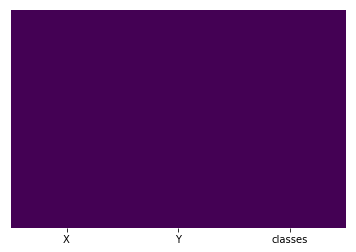

In [32]:
#to check null values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [33]:
x=data.drop('classes', axis=1)
y=data.classes

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=10)

In [35]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
predictions=knn.predict(x_test)
predictions

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,

In [43]:
confusion_matrix(y_test,predictions)

array([[205,   0],
       [  0, 195]], dtype=int64)

In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      1.00      1.00       195

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [38]:
knn.score(x_test,y_test)

1.0

In [39]:
precision_score(y_test,predictions)

1.0

In [40]:
f1_score(y_test,predictions)

1.0

In [41]:
y_pred_prob = knn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)

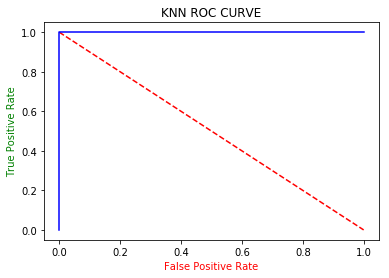

In [51]:
plt.plot([0,1], [1,0], 'k--',color='red')
plt.plot(fpr,tpr,color='blue')
plt.xlabel('False Positive Rate',color='r')
plt.ylabel('True Positive Rate',color='g')
plt.title('KNN ROC CURVE')
plt.show()